In [1]:
import os
import numpy as np
import pandas as pd
from utilities import cal_score

In [2]:
stack_idx = '18'
models = '1-10,12-22,24-29'
use_test_kfold = set([2, 7, 8, 12, 13])

### Read CV predictions and test

In [3]:
def parse_models(exp):
    exp_split = exp.split(',')
    idx_models = []
    for e in exp_split:
        if '-' in e:
            n0, n1 = e.split('-')
            idx_models.extend(list(range(int(n0), int(n1)+1, 1)))
        else:
            idx_models.append(int(e))
    return idx_models

In [4]:
idx_models = parse_models(models)
print(idx_models)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]


In [5]:
files_in_output = [f for f in os.listdir('output/') if os.path.isfile('output/'+f)]
files_cv = {idx: [f for f in files_in_output 
                  if f.startswith('model-%02d-' % idx) and f.endswith('cv.csv')][0] 
            for idx in idx_models}
files_test_one = {idx: [f for f in files_in_output 
                        if f.startswith('model-%02d-' % idx) and f.endswith('test-one.csv')][0]
                  for idx in idx_models}
files_test_kf = {idx: [f for f in files_in_output 
                       if f.startswith('model-%02d-' % idx) and f.endswith('test-kfold.csv')][0]
                 for idx in idx_models}

In [6]:
for k in files_cv: 
    print('%2d'%k, files_cv[k])
    print('%2d'%k, files_test_kf[k])
    print('%2d'%k, files_test_one[k])

 1 model-01-lgb-cv.csv
 1 model-01-lgb-test-kfold.csv
 1 model-01-lgb-test-one.csv
 2 model-02-keras-search-cv.csv
 2 model-02-keras-search-test-kfold.csv
 2 model-02-keras-search-test-one.csv
 3 model-03-lgb-feats-selection-cv.csv
 3 model-03-lgb-feats-selection-test-kfold.csv
 3 model-03-lgb-feats-selection-test-one.csv
 4 model-04-lgb-PCA-cv.csv
 4 model-04-lgb-PCA-test-kfold.csv
 4 model-04-lgb-PCA-test-one.csv
 5 model-05-lgb-wo-per-area-cv.csv
 5 model-05-lgb-wo-per-area-test-kfold.csv
 5 model-05-lgb-wo-per-area-test-one.csv
 6 model-06-lgb-lr0.001-cv.csv
 6 model-06-lgb-lr0.001-test-kfold.csv
 6 model-06-lgb-lr0.001-test-one.csv
 7 model-07-keras-embedding-cv.csv
 7 model-07-keras-embedding-test-kfold.csv
 7 model-07-keras-embedding-test-one.csv
 8 model-08-keras-search-long-cv.csv
 8 model-08-keras-search-long-test-kfold.csv
 8 model-08-keras-search-long-test-one.csv
 9 model-09-lgb-feats-selection-75-cv.csv
 9 model-09-lgb-feats-selection-75-test-kfold.csv
 9 model-09-lgb-fea

#### Load area

In [7]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [8]:
cv = df_train[['building_id', 'building_area', 'total_price']]
test = df_test[['building_id', 'building_area']]

print('CV predictions:')
for i, idx_model in enumerate(idx_models):
    f = files_cv[idx_model]
    print('No. {} file: {}'.format(i, f))
    df = pd.read_csv('output/'+f)
    
    cv = pd.merge(cv, df[['building_id', 'total_price_predict']], on='building_id')
    
    cv = cv.rename(columns = {'total_price_predict': 'pred_{}'.format(idx_model)})
    cv[f'log_pred_{idx_model}'] = np.log1p(cv[f'pred_{idx_model}'])
    cv[f'log_parea_pred_{idx_model}'] = np.log1p( cv[f'pred_{idx_model}'] / cv['building_area'] )

cv['log_total_price'] = np.log1p(cv['total_price'])
cv['log_parea_total_price'] = np.log1p( cv['total_price'] / cv['building_area'] )

print('Test predictions:')
for i, idx in enumerate(idx_models):
    f = files_test_kf[idx] if idx in use_test_kfold else files_test_one[idx]
    print('No. {} file: {}'.format(i, f))
    df = pd.read_csv('output/'+f)

    test = pd.merge(test, df[['building_id','total_price']], on='building_id')
        
    test = test.rename(columns = {'total_price': 'pred_{}'.format(idx)})
    test[f'log_pred_{idx}'] = np.log1p(test[f'pred_{idx}'])
    test[f'log_parea_pred_{idx}'] = np.log1p( test[f'pred_{idx}'] / test['building_area'] )

CV predictions:
No. 0 file: model-01-lgb-cv.csv
No. 1 file: model-02-keras-search-cv.csv
No. 2 file: model-03-lgb-feats-selection-cv.csv
No. 3 file: model-04-lgb-PCA-cv.csv
No. 4 file: model-05-lgb-wo-per-area-cv.csv
No. 5 file: model-06-lgb-lr0.001-cv.csv
No. 6 file: model-07-keras-embedding-cv.csv
No. 7 file: model-08-keras-search-long-cv.csv
No. 8 file: model-09-lgb-feats-selection-75-cv.csv
No. 9 file: model-10-lgb-feats-selection-75-lr-0.001-cv.csv
No. 10 file: model-12-predict-keras-search-prelu-cv.csv
No. 11 file: model-13-predict-keras-he_uni-cv.csv
No. 12 file: model-14-lgb-feats-selection-75-lr-0.001-rand-cv.csv
No. 13 file: model-15-lgb-feats-selection-75-lr-0.001-rand323-cv.csv
No. 14 file: model-16-lgb-feats-selection-68-lr-0.001-mix5-cv.csv
No. 15 file: model-17-lgb-feats-selection-70-lr-0.001-mix5-cv.csv
No. 16 file: model-18-lgb-feats-selection-70-lr-0.001-p5-cv.csv
No. 17 file: model-19-lgb-search-bins-lr-0.0005-cv.csv
No. 18 file: model-20-lgb-lr-0.0008-mix5-cv.csv
No

In [9]:
cv.head()

,building_id,building_area,total_price,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,...,log_pred_27,log_parea_pred_27,pred_28,log_pred_28,log_parea_pred_28,pred_29,log_pred_29,log_parea_pred_29,log_total_price,log_parea_total_price
0,e3mMIMR3JJqCaXz1,3.418175,6.476038e+05,6.331552e+05,13.358472,12.129369,717209.94,13.483125,12.254022,6.656891e+05,...,13.381324,12.152221,6.374413e+05,13.365219,12.136116,6.274171e+05,13.349368,12.120265,13.381036,12.151933
1,LgwzgklNvy4QCtq5,4.041309,3.321452e+06,3.064324e+06,14.935338,13.538770,2899842.20,14.880167,13.483600,3.079196e+06,...,14.955716,13.559149,3.160098e+06,14.966114,13.569546,3.145481e+06,14.961478,13.564910,15.015913,13.619345
2,ucIR2NLLsC3T650L,5.584279,9.570885e+06,9.827776e+06,16.100723,14.380769,9766813.00,16.094501,14.374546,9.814852e+06,...,16.092359,14.372404,9.804749e+06,16.098377,14.378423,9.762486e+06,16.094058,14.374103,16.074236,14.354282
3,jre1pJhcQj91Kdky,13.563031,1.421501e+07,1.255350e+07,16.345510,13.738164,12699800.00,16.357097,13.749750,1.255981e+07,...,16.348848,13.741502,1.263065e+07,16.351637,13.744290,1.262574e+07,16.351248,13.743901,16.469809,13.862462
4,rQpYpY9nRG7X5mmr,4.688108,7.627120e+05,1.215194e+06,14.010415,12.465389,2012610.50,14.514944,12.969916,1.128419e+06,...,13.938992,12.393966,1.132637e+06,13.940060,12.395034,1.128514e+06,13.936413,12.391388,13.544637,11.999613


In [10]:
test.head()

,building_id,building_area,pred_1,log_pred_1,log_parea_pred_1,pred_2,log_pred_2,log_parea_pred_2,pred_3,log_pred_3,...,log_parea_pred_26,pred_27,log_pred_27,log_parea_pred_27,pred_28,log_pred_28,log_parea_pred_28,pred_29,log_pred_29,log_parea_pred_29
0,X5gsdTWGS3W7JJQB,3.418175,1.526912e+07,16.541343,15.312236,12470072.0,16.338842,15.109735,1.531685e+07,16.544464,...,15.195091,1.405424e+07,16.458435,15.229328,1.485198e+07,16.513644,15.284537,1.458851e+07,16.495745,15.266638
1,BTshNOJyKHnT2YIT,7.726227,3.924241e+06,15.182684,13.138065,3916552.2,15.180723,13.136104,3.977095e+06,15.196062,...,13.135851,3.932854e+06,15.184876,13.140257,3.925095e+06,15.182901,13.138282,3.930381e+06,15.184247,13.139628
2,dhdymr0lV8N5kZOT,12.170581,1.096127e+07,16.209879,13.710858,11912735.0,16.293119,13.794098,1.084967e+07,16.199646,...,13.692710,1.040041e+07,16.157355,13.658335,1.066340e+07,16.182328,13.683307,1.053625e+07,16.170332,13.671312
3,VEwyGGMcD56w5BOc,2.252256,6.155550e+06,15.632865,14.820933,5940670.0,15.597333,14.785400,6.015238e+06,15.609807,...,14.801146,5.905111e+06,15.591329,14.779397,6.025775e+06,15.611557,14.799625,5.922934e+06,15.594343,14.782410
4,wmUeMoJZfsqaSX9b,5.813985,1.062995e+06,13.876602,12.116340,1088488.1,13.900301,12.140039,1.027248e+06,13.842395,...,12.147091,1.048505e+06,13.862877,12.102615,1.078927e+06,13.891479,12.131217,1.092658e+06,13.904125,12.143863


### Check models scores

In [11]:
scores_models = {idx_model: cal_score(cv['total_price'], cv[f'pred_{idx_model}'])
                 for idx_model in idx_models}

In [12]:
for i, (idx_model, s) in enumerate(scores_models.items()):
    print('%2d'%i, 'model-%02d'%idx_model, '%.6f'%s)

 0 model-01 5870.873059
 1 model-02 5400.852164
 2 model-03 5877.873452
 3 model-04 5713.867808
 4 model-05 5724.869598
 5 model-06 5886.873769
 6 model-07 5171.836449
 7 model-08 5514.858826
 8 model-09 5872.873118
 9 model-10 5897.873845
10 model-12 5486.856963
11 model-13 5506.858055
12 model-14 5908.873901
13 model-15 5900.873836
14 model-16 5907.874126
15 model-17 5905.874165
16 model-18 5908.874297
17 model-19 5911.874156
18 model-20 5908.874040
19 model-21 5758.870702
20 model-22 5752.870671
21 model-24 5866.873835
22 model-25 5908.874238
23 model-26 5918.873998
24 model-27 5892.873194
25 model-28 5901.874202
26 model-29 5884.873848


### Search subset model mean 

In [13]:
def get_prefix(is_per_area, is_log):
    if is_log:
        if is_per_area:
            col_prefix = 'log_parea_pred'
        else:
            col_prefix = 'log_pred'
    else:
        if is_per_area:
            raise 'Not support'
        else:
            col_prefix = 'pred'
    return col_prefix

In [14]:
def mean_subset(df, idx_models, is_per_area, is_log):
    col_prefix = get_prefix(is_per_area, is_log)
    cols_models = [col_prefix+'_'+str(i) for i in idx_models]
    return df[cols_models].mean(axis=1)

In [15]:
def predict_mean_subset(df, idx_models, is_per_area, is_log):
    y_pred = mean_subset(df, idx_models, is_per_area, is_log)
    y_pred_final = y_pred
    if is_log:
        y_pred_final = np.expm1(y_pred_final)
    if is_per_area:
        y_pred_final = y_pred_final * df['building_area']
    return y_pred_final

In [16]:
def search_mean_subset(cv, idx_models, is_per_area, is_log):
    idx_models_subset = idx_models.copy()
    result_list = []
    y_pred_cv = predict_mean_subset(cv, idx_models_subset, is_per_area=is_per_area, is_log=is_log)
    score = cal_score(cv['total_price'], y_pred_cv)
    print('%.6f'%score, idx_models_subset)
    result_list.append([score, idx_models_subset])
    while len(idx_models_subset) > 1:
        print('N models remained:', len(idx_models_subset))
        result_list_subset = []
        for i_rm in range(len(idx_models_subset)):
            idx_models_subset_next = idx_models_subset[:i_rm]+idx_models_subset[i_rm+1:]
            y_pred_cv = predict_mean_subset(cv, idx_models_subset_next, is_per_area=is_per_area, is_log=is_log)
            score = cal_score(cv['total_price'], y_pred_cv)
            print('%.6f'%score, idx_models_subset_next)
            result_list_subset.append([score, idx_models_subset_next])
        result_list.extend(result_list_subset)
        result_list_subset.sort(key=lambda x: x[0], reverse=True)
        print('Best of the round:', result_list_subset[0][0], result_list_subset[0][1])
        idx_models_subset = result_list_subset[0][1]
        print()
    result_list.sort(key=lambda x: x[0], reverse=True)
    return result_list

#### Log mean

In [17]:
result_list_log = search_mean_subset(cv, idx_models, is_per_area=False, is_log=True)

5944.875504 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
N models remained: 27
5944.875522 [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5942.875473 [1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5943.875506 [1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5942.875505 [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5941.875458 [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5943.875514 [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5943.875473 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5940.875460 [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28

5945.875493 [1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28]
Best of the round: 5953.875431794345 [1, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]

N models remained: 24
5950.875465 [3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5952.875447 [1, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5955.875438 [1, 3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5954.875394 [1, 3, 4, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5952.875455 [1, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5952.875294 [1, 3, 4, 5, 6, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5952.875459 [1, 3, 4, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5944.875326 [1, 3, 4, 5, 6, 8, 10, 13, 14, 15, 1

5954.875374 [3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 26, 27, 28, 29]
5957.875383 [3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 25, 26, 27, 28, 29]
5957.875453 [3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29]
5959.875464 [3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 27, 28, 29]
5957.875444 [3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 28, 29]
5960.875457 [3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 29]
5958.875449 [3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28]
Best of the round: 5961.875473922974 [3, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29]

N models remained: 20
5958.875486 [5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29]
5954.875404 [3, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29]
5960.875496 [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25

5955.875460 [3, 8, 12, 13, 14, 17, 18, 19, 20, 22, 24, 26, 27, 28]
5954.875480 [3, 5, 12, 13, 14, 17, 18, 19, 20, 22, 24, 26, 27, 28]
5951.875537 [3, 5, 8, 13, 14, 17, 18, 19, 20, 22, 24, 26, 27, 28]
5954.875528 [3, 5, 8, 12, 14, 17, 18, 19, 20, 22, 24, 26, 27, 28]
5956.875540 [3, 5, 8, 12, 13, 17, 18, 19, 20, 22, 24, 26, 27, 28]
5956.875531 [3, 5, 8, 12, 13, 14, 18, 19, 20, 22, 24, 26, 27, 28]
5952.875522 [3, 5, 8, 12, 13, 14, 17, 19, 20, 22, 24, 26, 27, 28]
5956.875529 [3, 5, 8, 12, 13, 14, 17, 18, 20, 22, 24, 26, 27, 28]
5952.875538 [3, 5, 8, 12, 13, 14, 17, 18, 19, 22, 24, 26, 27, 28]
5956.875463 [3, 5, 8, 12, 13, 14, 17, 18, 19, 20, 24, 26, 27, 28]
5951.875440 [3, 5, 8, 12, 13, 14, 17, 18, 19, 20, 22, 26, 27, 28]
5953.875537 [3, 5, 8, 12, 13, 14, 17, 18, 19, 20, 22, 24, 27, 28]
5957.875505 [3, 5, 8, 12, 13, 14, 17, 18, 19, 20, 22, 24, 26, 28]
5955.875524 [3, 5, 8, 12, 13, 14, 17, 18, 19, 20, 22, 24, 26, 27]
Best of the round: 5957.875504560616 [3, 5, 8, 12, 13, 14, 17, 18, 19, 20,

In [18]:
display(result_list_log[:10])

[[5961.875506791447,
  [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29]],
 [5961.875473922974,
  [3,
   5,
   6,
   8,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   22,
   24,
   25,
   26,
   27,
   28,
   29]],
 [5961.87544067905,
  [3,
   5,
   6,
   8,
   10,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   22,
   24,
   25,
   26,
   27,
   28,
   29]],
 [5960.875535573506,
  [3, 5, 8, 12, 13, 14, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29]],
 [5960.8755211020325,
  [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 22, 24, 25, 26, 27, 28, 29]],
 [5960.875511458838,
  [5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29]],
 [5960.875509209059,
  [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28]],
 [5960.875503627666,
  [5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29]],
 [5960.87549607151,
  [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 28, 29]],
 [5960.8754742322

In [19]:
best_models_subset_log = result_list_log[0][1]
print('Best score and subset:', '%.6f'%result_list_log[0][0], best_models_subset_log)
for idx_model in best_models_subset_log:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 5961.875507 [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29]
model-03 5877.873452
model-05 5724.869598
model-08 5514.858826
model-12 5486.856963
model-13 5506.858055
model-14 5908.873901
model-15 5900.873836
model-16 5907.874126
model-17 5905.874165
model-18 5908.874297
model-19 5911.874156
model-20 5908.874040
model-22 5752.870671
model-24 5866.873835
model-26 5918.873998
model-27 5892.873194
model-28 5901.874202
model-29 5884.873848


In [20]:
len(best_models_subset_log)

18

In [21]:
# per area or not for the mean ensemble model are the same
#result_list_per_area_log = search_mean_subset(cv, idx_models, is_per_area=True, is_log=True)
#result_list_per_area_log

#### Linear mean

In [22]:
result_list_none = search_mean_subset(cv, idx_models, is_per_area=False, is_log=False)

5939.874652 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
N models remained: 27
5940.874642 [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5944.874699 [1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5938.874627 [1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5938.874641 [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5940.874588 [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5938.874633 [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5942.875025 [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5944.874638 [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28

5950.875052 [1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28]
Best of the round: 5953.8750781723775 [1, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]

N models remained: 24
5950.875100 [3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5949.875082 [1, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5954.875090 [1, 3, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5953.875042 [1, 3, 4, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5952.875089 [1, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5944.875003 [1, 3, 4, 5, 6, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5953.875093 [1, 3, 4, 5, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29]
5944.875043 [1, 3, 4, 5, 6, 8, 10, 13, 14, 15, 

5953.874997 [1, 3, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 29]
5953.875060 [1, 3, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 26, 27, 28, 29]
5955.875071 [1, 3, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28, 29]
5954.875053 [1, 3, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 28, 29]
5955.875063 [1, 3, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 29]
5954.875057 [1, 3, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28]
Best of the round: 5960.87508175082 [1, 3, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]

N models remained: 20
5959.875104 [3, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]
5960.875082 [1, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]
5959.875092 [1, 3, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]
5951.875020 [1, 3, 6, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26

5953.875191 [6, 8, 13, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28, 29]
5953.875180 [6, 8, 13, 15, 17, 18, 19, 21, 22, 24, 25, 27, 28, 29]
5953.875176 [6, 8, 13, 15, 16, 18, 19, 21, 22, 24, 25, 27, 28, 29]
5953.875166 [6, 8, 13, 15, 16, 17, 19, 21, 22, 24, 25, 27, 28, 29]
5952.875174 [6, 8, 13, 15, 16, 17, 18, 21, 22, 24, 25, 27, 28, 29]
5956.875103 [6, 8, 13, 15, 16, 17, 18, 19, 22, 24, 25, 27, 28, 29]
5955.875100 [6, 8, 13, 15, 16, 17, 18, 19, 21, 24, 25, 27, 28, 29]
5950.875080 [6, 8, 13, 15, 16, 17, 18, 19, 21, 22, 25, 27, 28, 29]
5953.875165 [6, 8, 13, 15, 16, 17, 18, 19, 21, 22, 24, 27, 28, 29]
5950.875157 [6, 8, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 28, 29]
5953.875170 [6, 8, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 29]
5949.875162 [6, 8, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28]
Best of the round: 5956.87510264205 [6, 8, 13, 15, 16, 17, 18, 19, 22, 24, 25, 27, 28, 29]

N models remained: 14
5952.875111 [8, 13, 15, 16, 17, 18, 19, 22, 24, 25, 27, 28, 29]
5946.874979 [6, 13

In [23]:
display(result_list_none[:10])

[[5960.875091343384,
  [1, 3, 6, 8, 12, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]],
 [5960.875082147267,
  [1, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]],
 [5960.87508175082,
  [1,
   3,
   6,
   8,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   21,
   22,
   24,
   25,
   26,
   27,
   28,
   29]],
 [5959.875104006798,
  [3, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]],
 [5959.875103957208,
  [6, 8, 12, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]],
 [5959.875091803407,
  [1, 3, 8, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]],
 [5959.875089024389,
  [1, 6, 8, 12, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]],
 [5958.8751605479, [8, 17, 22, 24, 27]],
 [5958.875098731293,
  [1, 3, 8, 12, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]],
 [5958.875097569281,
  [1, 3, 6, 8, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]]]

In [24]:
best_models_subset_none = result_list_none[0][1]
print('Best score and subset:', '%.6f'%result_list_none[0][0], best_models_subset_none)
for idx_model in best_models_subset_none:
    print('model-%02d'%idx_model, '%.6f'%scores_models[idx_model])

Best score and subset: 5960.875091 [1, 3, 6, 8, 12, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]
model-01 5870.873059
model-03 5877.873452
model-06 5886.873769
model-08 5514.858826
model-12 5486.856963
model-13 5506.858055
model-15 5900.873836
model-16 5907.874126
model-17 5905.874165
model-18 5908.874297
model-19 5911.874156
model-21 5758.870702
model-22 5752.870671
model-24 5866.873835
model-25 5908.874238
model-26 5918.873998
model-27 5892.873194
model-28 5901.874202
model-29 5884.873848


### Compute submission for mean log

In [25]:
import matplotlib.pyplot as plt

In [26]:
print('Predict for mean log with', best_models_subset_log)
test['total_price'] = predict_mean_subset(test, best_models_subset_log, is_per_area=False, is_log=True)

Predict for mean log with [3, 5, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 27, 28, 29]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


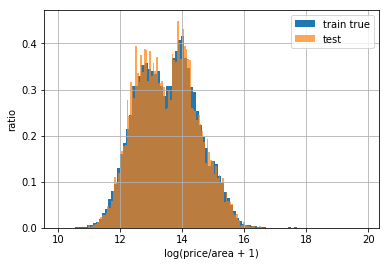

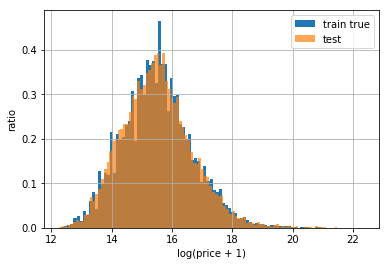

In [27]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(np.log1p(cv['building_area']), bins=100, label='train', normed=True)
plt.hist(np.log1p(test['building_area']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(building_area + 1)'); plt.ylabel('ratio'); plt.yscale('log')
plt.legend(); plt.grid(); plt.show()

In [28]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.385361e+07
1,BTshNOJyKHnT2YIT,3.924782e+06
2,dhdymr0lV8N5kZOT,1.095087e+07
3,VEwyGGMcD56w5BOc,5.985690e+06
4,wmUeMoJZfsqaSX9b,1.067865e+06
9995,UEeCDaAJzPwdKKKA,1.231166e+06
9996,i0fgbPaQsDWs7Q87,4.714483e+07
9997,YunNwAhcqkf6YclI,1.098235e+06
9998,A2NotxtRY9MYoWMl,2.984735e+06
9999,kKvgBXiA50gRmQhP,3.117959e+06


shape = (10000, 2)


In [29]:
output_filename = 'output/stack_meanlog_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_meanlog_18_1-10,12-22,24-29.csv


In [30]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [31]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.385361e+07
1,BTshNOJyKHnT2YIT,3.924782e+06
2,dhdymr0lV8N5kZOT,1.095087e+07
3,VEwyGGMcD56w5BOc,5.985690e+06
4,wmUeMoJZfsqaSX9b,1.067865e+06
9995,UEeCDaAJzPwdKKKA,1.231166e+06
9996,i0fgbPaQsDWs7Q87,4.714483e+07
9997,YunNwAhcqkf6YclI,1.098235e+06
9998,A2NotxtRY9MYoWMl,2.984735e+06
9999,kKvgBXiA50gRmQhP,3.117959e+06


shape = (10000, 2)


### Compute submission for linear mean

In [32]:
import matplotlib.pyplot as plt

In [33]:
print('Predict for liear mean with', best_models_subset_none)
test['total_price'] = predict_mean_subset(test, best_models_subset_none, is_per_area=False, is_log=False)

Predict for liear mean with [1, 3, 6, 8, 12, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


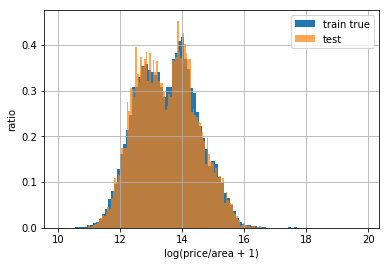

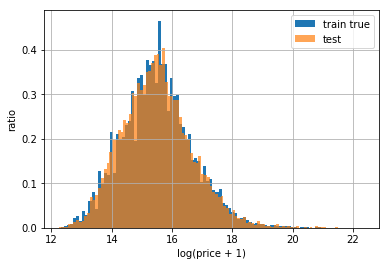

In [34]:
plt.hist(cv['log_parea_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price'] / test['building_area']), bins=100, label='test',
         normed=True, alpha=0.7)
plt.xlabel('log(price/area + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

plt.hist(cv['log_total_price'], bins=100, label='train true', normed=True)
plt.hist(np.log1p(test['total_price']), bins=100, label='test', normed=True, alpha=0.7)
plt.xlabel('log(price + 1)'); plt.ylabel('ratio')
plt.legend(); plt.grid(); plt.show()

In [35]:
test[['building_id', 'total_price']].check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.390394e+07
1,BTshNOJyKHnT2YIT,3.924789e+06
2,dhdymr0lV8N5kZOT,1.098352e+07
3,VEwyGGMcD56w5BOc,5.987318e+06
4,wmUeMoJZfsqaSX9b,1.066824e+06
9995,UEeCDaAJzPwdKKKA,1.230010e+06
9996,i0fgbPaQsDWs7Q87,4.739660e+07
9997,YunNwAhcqkf6YclI,1.097613e+06
9998,A2NotxtRY9MYoWMl,2.985698e+06
9999,kKvgBXiA50gRmQhP,3.127253e+06


shape = (10000, 2)


In [36]:
output_filename = 'output/stack_mean_{}_{}.csv'.format(stack_idx, models)
print('Output file to:', output_filename)

Output file to: output/stack_mean_18_1-10,12-22,24-29.csv


In [37]:
test[['building_id', 'total_price']].to_csv(output_filename, index=False)

In [38]:
pd.read_csv(output_filename).check()

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.390394e+07
1,BTshNOJyKHnT2YIT,3.924789e+06
2,dhdymr0lV8N5kZOT,1.098352e+07
3,VEwyGGMcD56w5BOc,5.987318e+06
4,wmUeMoJZfsqaSX9b,1.066824e+06
9995,UEeCDaAJzPwdKKKA,1.230010e+06
9996,i0fgbPaQsDWs7Q87,4.739660e+07
9997,YunNwAhcqkf6YclI,1.097613e+06
9998,A2NotxtRY9MYoWMl,2.985698e+06
9999,kKvgBXiA50gRmQhP,3.127253e+06


shape = (10000, 2)
